In [16]:
import os
import numpy as np
import h5py

In [32]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [34]:
import umap

In [17]:
filepath1 = '/home/nrpu88/StarNet-UVic/intri2000'
filepath2 = '/home/nrpu88/StarNet-UVic/intri2000_1'
filepath3 = '/home/nrpu88/StarNet-UVic/intri2000_2_1'
filepath4 = '/home/nrpu88/StarNet-UVic/intri2000_2_2'
filepath5 = '/home/nrpu88/StarNet-UVic/intri2000_3'


In [18]:
f1 = h5py.File(filepath1, 'r')
f2 = h5py.File(filepath2, 'r')
f3 = h5py.File(filepath3, 'r')
f4 = h5py.File(filepath4, 'r')
f5 = h5py.File(filepath5, 'r')


In [19]:
dset1_a = f1['ambre_flux']
dset1_p = f1['phoenix_flux']
dset1_i = f1['intrigoss_flux']

In [20]:
dset2_a = f2['ambre_flux']
dset2_p = f2['phoenix_flux']
dset2_i = f2['intrigoss_flux']

In [21]:
dset3_a = f3['ambre_flux']
dset3_p = f3['phoenix_flux']
dset3_i = f3['intrigoss_flux']

In [22]:
dset4_a = f4['ambre_flux']
dset4_p = f4['phoenix_flux']
dset4_i = f4['intrigoss_flux']

In [23]:
dset5_a = f5['ambre_flux']
dset5_p = f5['phoenix_flux']
dset5_i = f5['intrigoss_flux']

In [24]:
flux_a_fin = []
flux_p_fin = []
flux_i_fin = []

for i in dset1_a:
    flux_a_fin.append(i)
for i in dset1_p:
    flux_p_fin.append(i)
for i in dset1_i:
    flux_i_fin.append(i)


In [25]:
for i in dset2_a:
    flux_a_fin.append(i)
for i in dset2_p:
    flux_p_fin.append(i)
for i in dset2_i:
    flux_i_fin.append(i)

In [26]:
for i in dset3_a:
    flux_a_fin.append(i)
for i in dset3_p:
    flux_p_fin.append(i)
for i in dset3_i:
    flux_i_fin.append(i)

In [27]:
for i in dset4_a:
    flux_a_fin.append(i)
for i in dset4_p:
    flux_p_fin.append(i)
for i in dset4_i:
    flux_i_fin.append(i)

In [28]:
for i in dset5_a:
    flux_a_fin.append(i)
for i in dset5_p:
    flux_p_fin.append(i)
for i in dset5_i:
    flux_i_fin.append(i)

In [30]:
flux_a_fin = np.asarray(flux_a_fin)
flux_p_fin = np.asarray(flux_p_fin)
flux_i_fin = np.asarray(flux_i_fin)

print(flux_a_fin.shape)
print(flux_p_fin.shape)
print(flux_i_fin.shape)


(3403, 10000)
(3198, 10000)
(6150, 10000)


In [31]:
grid_data = []
for i in flux_i_fin:
    grid_data.append(i)
for j in flux_p_fin:
    grid_data.append(j)
for k in flux_a_fin:
    grid_data.append(k)

grid_data = np.asarray(grid_data)
print(grid_data.shape)

(12751, 10000)


In [35]:
reducer = umap.UMAP(init = 'random')
embedding = reducer.fit_transform(grid_data)

In [37]:
grid_target=[]
for i in range(len(flux_i_fin)):
    grid_target.append(0)
for j in range(len(flux_p_fin)):
    grid_target.append(1)
for k in range(len(flux_a_fin)):
    grid_target.append(2)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

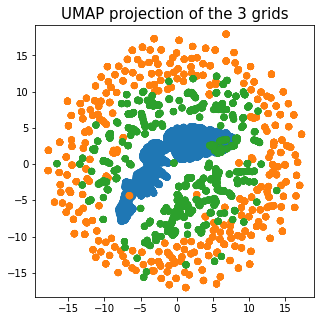

In [43]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in grid_target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the 3 grids', fontsize=15);

#Blue-intrigoss
#Green-ambre
#Orange-phoenix